In [3]:
#pip install yfinance

In [4]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

In [5]:
#!pip install -U pymc3

In [8]:
#!pip install pymc-learn

In [9]:
import os
os.environ['THEANO_FLAGS'] = 'contexts=dev0->cuda0;dev1->cuda1'
import theano

In [56]:
from typing import Tuple
import numpy as np
import pandas as pd
import scipy


def generate_data(
    data: pd.DataFrame, window_size: int, shift: int
) -> Tuple[np.array, np.array]:
    '''Generates data, X and y, based on stock price
    history given a window_size and a shift.
    
    The price level is extracted over a window, a
    period of days, Finally, a day, shift days later,
    is to be compared against.    

    Parameters:
    -----------
    data - stock prices over time
    window_size - window size; how many days in X
    shift - which point to extract as y? This is
        taken with respect to the last point in X.
    
    Returns:
    --------
    X - history of stock prices with their window
    y - the stock prices in the future to be predicted
    
    X - Windows are normalized to mean 0 and then 
    differenced (each value in a window to the 
    previous values) - as percentage change. The
    differencing step is to introduce a measure of 
    stationarity. 
    
    y - as percentage change with respect to the
    last value in the window.    
    
    This is to help to answer the following question:
    Given the level of prices, are they going to
    rise or to fall, and how much?    
    '''
    y = data.shift(shift + window_size)
    observation_window = []
    for i in range(window_size):
        observation_window.append(
            data.shift(i)
        )
    X = pd.concat(observation_window, axis=1)
    y = (y - X.values[:, -1]) / X.values[:, -1]
    X = X.pct_change(axis=1).values[:, 1:]
    inds = (~np. isnan(X).any(axis=1)) & (~np. isnan(y))
    X, y = X[inds], y[inds]
    return X, y

In [140]:
from sklearn.model_selection import train_test_split

X, y = generate_data(hist.Close, shift=1, window_size=30)
X_train, X_test, y_train, y_test = train_test_split(X, y)


#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [139]:
pd.DataFrame(X).mean()

0    -0.000624
1    -0.000642
2    -0.000657
3    -0.000652
4    -0.000636
5    -0.000636
6    -0.000634
7    -0.000636
8    -0.000648
9    -0.000653
10   -0.000656
11   -0.000655
12   -0.000651
13   -0.000653
14   -0.000647
15   -0.000647
16   -0.000647
17   -0.000646
18   -0.000647
19   -0.000639
20   -0.000640
21   -0.000638
22   -0.000642
23   -0.000644
24   -0.000636
25   -0.000641
26   -0.000634
27   -0.000635
28   -0.000606
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80d79d23d0>,
      dtype=object)

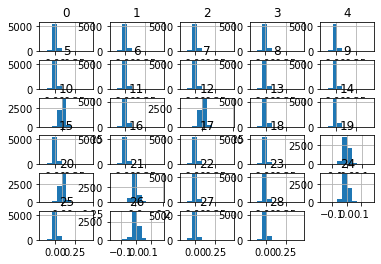

In [141]:
pd.DataFrame(X_train).hist()

In [78]:
pd.DataFrame(X_train).mean()

0     9.405978e-17
1    -9.033188e-17
2    -1.436556e-16
3    -1.394739e-16
4     2.075093e-16
5    -4.114883e-17
6     4.122437e-17
7    -1.601665e-16
8     6.288980e-17
9    -4.340208e-17
10    4.159344e-17
11   -5.057623e-17
12   -2.758647e-16
13   -1.843706e-16
14   -7.867767e-17
15   -9.759829e-17
16    6.968678e-17
17   -7.235443e-17
18    7.360839e-18
19   -1.493071e-16
20    2.614733e-16
21    7.036718e-17
22    1.864507e-16
23   -8.108254e-17
24   -2.281310e-18
25   -1.900674e-16
26    1.960070e-16
27   -1.844105e-16
28   -7.735302e-18
dtype: float64

In [79]:
pd.DataFrame(X_test).mean()

0    -0.016567
1     0.015960
2    -0.000875
3     0.019636
4    -0.055043
5     0.037148
6    -0.011242
7    -0.026143
8    -0.047891
9     0.026660
10    0.023528
11    0.017983
12    0.025599
13   -0.023639
14   -0.015151
15   -0.011146
16   -0.000289
17    0.019005
18    0.038278
19    0.031443
20    0.037339
21    0.016925
22   -0.022138
23    0.001445
24    0.026659
25   -0.027732
26    0.012100
27    0.016633
28   -0.004511
dtype: float64

In [80]:
pd.DataFrame(X).std()

0     0.023475
1     0.023511
2     0.023561
3     0.023557
4     0.023624
5     0.023624
6     0.023624
7     0.023623
8     0.023670
9     0.023666
10    0.023665
11    0.023665
12    0.023663
13    0.023662
14    0.023657
15    0.023657
16    0.023657
17    0.023657
18    0.023656
19    0.023645
20    0.023644
21    0.023644
22    0.023640
23    0.023639
24    0.023629
25    0.023624
26    0.023616
27    0.023616
28    0.023668
dtype: float64

In [252]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'values')

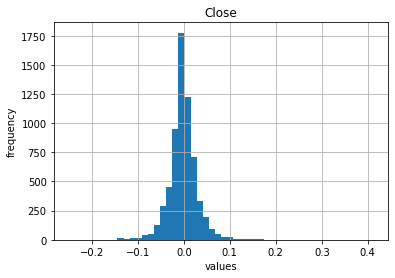

In [253]:
pd.DataFrame(y_train).hist(bins=50)
plt.ylabel('frequency')
plt.xlabel('values')

In [255]:
(y > 0).mean()

0.4330534173081409

In [83]:
import pmlearn
from pmlearn.neural_network import MLPClassifier

In [98]:
model2 = MLPRegressor(n_hidden=10)
model2.fit(X_train, y_train, inference_type='advi')

NameError: name 'pm' is not defined

In [85]:
y_pred = model2.predict(X_test)

/home/ben/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 2000/2000 [00:37<00:00, 53.29it/s]


In [86]:
y_pred_prob = model2.predict_proba(X_test)

100%|██████████| 2000/2000 [00:37<00:00, 53.20it/s]


In [109]:
model2._estimator_type

'regressor'

In [87]:
type(y_pred_prob)

numpy.ndarray

In [279]:
import sklearn
import scipy


def to_one_hot(a, classes=[-1, 0, 1]):
    """convert from integer encoding to one-hot"""
    b = np.zeros((a.size, 3))
    b[np.arange(a.size), (np.rint(a)+1).astype(int)] = 1
    return b

def measure_perf(model, y_test):
    y_pred = model.predict(X_test)
    print('AUC: {:.3f}'.format(
        sklearn.metrics.roc_auc_score(
            to_one_hot(y_test), to_one_hot(y_pred), multi_class='ovo'
    )))
    print('mse pred: {}'.format(
        sklearn.metrics.mean_squared_error(y_test, y_pred)
    ))
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)
        y_pred_reg = np.average(
            np.repeat(
                np.array([-1, 0, 1]).reshape(1, -1),
                X_test.shape[0],
                axis=0
            ),
            axis=1,
            weights=y_pred_proba
        )    
        print('mse prob: {}'.format(
            sklearn.metrics.mean_squared_error(y_test, y_pred_reg)
        ))
        

assert to_one_hot(y_test_classes.astype(int)).shape[1] == 3

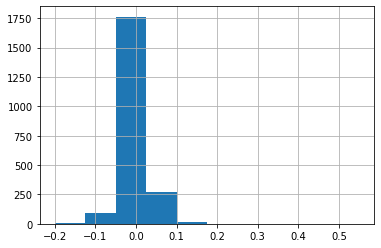

In [142]:
pd.Series(y_test).hist()

In [155]:
def threshold_vector(x, threshold=0.02):
    def threshold_scalar(f):
        if f > threshold:
            return 1
        elif f < -threshold:
            return -1
        return 0
    return np.vectorize(threshold_scalar)(x)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80d29271d0>,
      dtype=object)

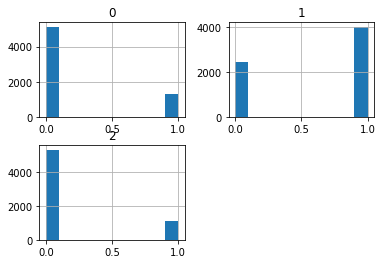

In [227]:
pd.DataFrame(to_one_hot(y_train_classes)).hist()

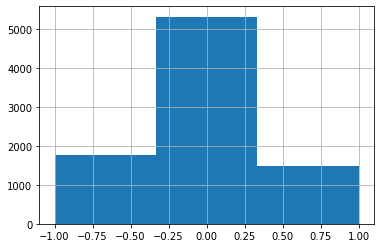

In [256]:
y_train_classes, y_test_classes = threshold_vector(y_train), threshold_vector(y_test)
pd.Series(threshold_vector(y)).hist(bins=3)

In [300]:
from sklearn.ensemble import StackingClassifier, StackingRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import ComplementNB, CategoricalNB
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import BayesianRidge, LinearRegression, LogisticRegression
from imblearn.pipeline import make_pipeline

# see also the naivebayes-predictor library that implements a wider range of supported distribution than what comes with sklearn's implementation

def create_classifier(final_estimator):
    print(f'{final_estimator.__class__.__name__}:')
    if final_estimator._estimator_type == 'regressor':
        estimators = [
            ('rf', RandomForestRegressor(
                n_estimators=100,
                n_jobs=-1
            ))
        ]        
        return StackingRegressor(
            estimators=estimators,
            final_estimator=final_estimator,
        ).fit(X_train, y_train_classes)
    else:
        estimators = [
            ('rf', RandomForestClassifier(
                n_estimators=100,
                n_jobs=-1
            ))
        ]                
        return StackingClassifier(
            estimators=estimators,
            final_estimator=final_estimator,
            #stack_method='predict_proba'
        ).fit(X_train, y_train_classes)

measure_perf(create_classifier(ComplementNB()), y_test_classes)
measure_perf(create_classifier(CategoricalNB()), y_test_classes)
measure_perf(create_classifier(BayesianRidge()), y_test_classes)
measure_perf(create_classifier(LinearRegression()), y_test_classes)

In [ ]:
ComplementNB:
AUC: 0.592
mse pred: 0.8875932835820896
mse prob: 0.3852515196794511
BayesianRidge:
AUC: 0.500
mse pred: 0.38287576944048873
LinearRegression:
AUC: 0.500
mse pred: 0.3824166816429526

In [302]:
from sklearn.multiclass import OneVsRestClassifier

measure_perf(
        OneVsRestClassifier(
            MLPClassifier(n_hidden=5)
        ).fit(X_train, y_train_classes),
    y_test_classes
)

Average Loss = 4,442.4: 100%|██████████| 200000/200000 [20:07<00:00, 165.66it/s]
Finished [100%]: Average Loss = 4,442.4
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

IndexError: too many indices for array

In [294]:
from sklearn.calibration import CalibratedClassifierCV

rf = RandomForestClassifier(n_estimators=500, n_jobs=-1).fit(X_train, y_train_classes)
platt = CalibratedClassifierCV(rf, method='sigmoid').fit(X_train, y_train_classes)
isotonic = CalibratedClassifierCV(rf, method='isotonic').fit(X_train, y_train_classes)
measure_perf(platt, y_test_classes)
measure_perf(isotonic, y_test_classes)

AUC: 0.504
mse pred: 0.40531716417910446
mse prob: 0.3824301244737257
AUC: 0.505
mse pred: 0.4137126865671642
mse prob: 0.3818975922567544


In [286]:
measure_perf(rf, y_test_classes)

AUC: 0.585
mse pred: 0.9547574626865671
mse prob: 0.3874970223843709


In [261]:
clf.__class__.__name__

'StackingClassifier'

In [259]:
measure_perf(clf, y_test_classes)

AUC: 0.584
mse pred: 0.9253731343283582
mse prob: 0.3852550008275913


In [249]:
measure_perf(clf.estimators_[0], y_test_classes)  # only the RF

AUC: 0.507
mse pred: 1.5163246268656716
mse prob: 0.3815309365671642


In [250]:
nb = ComplementNB().fit(X_train, y_train_classes)

ValueError: Negative values in data passed to ComplementNB (input X)

In [147]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
# see also the naivebayes-predictor library that implements a wider range of supported distribution than what comes with sklearn's implementation
estimators = [
    ('rf', RandomForestRegressor(n_estimators=500, n_jobs=-1)),
]
clf = StackingRegressor(
    estimators=estimators,
    final_estimator=BayesianRidge()
)
clf.fit(X_train, y_train)

StackingRegressor(cv=None,
                  estimators=[('rf',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     

In [148]:
measure_perf(clf)

MSE: 0.001
correlation: (0.13153447531317589, 9.746120026293226e-10)
AUC: 0.502


In [ ]:
lift_chart(y_test, y_pred_prob)

In [99]:
from pmlearn.base import BayesianModel, BayesianRegressorMixin
import pymc3 as pm
import theano


floatX = theano.config.floatX
class MLPRegressor(BayesianModel, BayesianRegressorMixin):
    """ Multilayer perceptron regression built using PyMC3.
    Fit a Multilayer perceptron regressor model and estimate
    model parameters using MCMC algorithms or Variational
    Inference algorithms.
    
    Parameters
    ----------
    Examples
    --------
    Reference
    ----------
    http://twiecki.github.io/blog/2016/06/01/bayesian-deep-learning/
    """
    def __init__(self, n_hidden=5):
        self.n_hidden = n_hidden
        self.num_training_samples = None
        self.num_pred = None
        self.total_size = None

        super(MLPRegressor, self).__init__()

    def create_model(self):
        """
        Returns
        -------
        """
        model_input = theano.shared(np.zeros([self.num_training_samples,
                                              self.num_pred]))

        model_output = theano.shared(np.zeros(self.num_training_samples))

        self.shared_vars = {
            'model_input': model_input,
            'model_output': model_output,
        }

        self.total_size = len(model_output.get_value())

        # Initialize random weights between each layer
        init_1 = np.random.randn(self.num_pred, self.n_hidden).astype(floatX)
        init_2 = np.random.randn(self.n_hidden, self.n_hidden).astype(floatX)
        init_out = np.random.randn(self.n_hidden).astype(floatX)

        model = pm.Model()

        with model:
            # Weights from input to hidden layer
            weights_in_1 = pm.Normal('w_in_1', 0, sd=1,
                                     shape=(self.num_pred, self.n_hidden),
                                     testval=init_1)

            # Weights from 1st to 2nd layer
            weights_1_2 = pm.Normal('w_1_2', 0, sd=1,
                                    shape=(self.n_hidden, self.n_hidden),
                                    testval=init_2)

            # Weights from hidden layer to output
            weights_2_out = pm.Normal('w_2_out', 0, sd=1,
                                      shape=(self.n_hidden,),
                                      testval=init_out)

            # Build neural-network using tanh activation function
            act_1 = pm.math.tanh(pm.math.dot(model_input, weights_in_1))
            act_2 = pm.math.tanh(pm.math.dot(act_1, weights_1_2))
            act_out = pm.math.sigmoid(pm.math.dot(act_2, weights_2_out))

            # Binary classification -> Bernoulli likelihood
            y = pm.Normal(
                'y',
                act_out,
                observed=model_output,
                total_size=self.total_size
            )
        return model

    def save(self, file_prefix):
        params = {
            'inference_type': self.inference_type,
            'num_pred': self.num_pred,
            'num_training_samples': self.num_training_samples
        }

        super(MLPRegressor, self).save(file_prefix, params)

    def load(self, file_prefix):
        params = super(MLPRegressor, self).load(
            file_prefix,
            load_custom_params=True
        )

        self.inference_type = params['inference_type']
        self.num_pred = params['num_pred']
        self.num_training_samples = params['num_training_samples']


In [576]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

def fit_distribution(data, distribution, bins=200, ax=None):
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    
    # fit dist to data 
    params = distribution.fit(data)
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    # Calculate fitted PDF and error with fit in distribution
    pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
    sse = np.sum(np.power(y - pdf, 2.0))
    # if axis pass in add to plot
    try:
        if ax:
            pd.Series(pdf, x).plot(ax=ax)
        end
    except Exception:
        pass
    return params, sse
    
# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Distributions to check
    DISTRIBUTIONS = [       
        st.uniform, st.norm, st.truncnorm, st.beta, st.laplace, st.t, st.cauchy,
        st.gamma, st.invgamma, st.weibull_min, st.lognorm, st.chi2, st.wald, st.exponnorm,
        st.vonmises, st.triang, st.gumbel_l, st.rice, st.logistic, st.expon
        #st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        #st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        #st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        #st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        #st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        #st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        #st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        #st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        #st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        #st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                params, sse = fit_distribution(
                    data, distribution, bins, ax
                )
                
                # identify if this distribution is better
                print('distribution name: {}; error: {}\nparams: {}'.format(
                    distribution.name, sse,
                    params
                ))
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate Probability Distribution Function for a distribution
    """
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)
    return pdf

In [577]:
from cycler import cycler
from matplotlib.cm import get_cmap


def compare_distribution_fits(data, title='distribution'):
    # Plot for comparison
    plt.figure(figsize=(12,8))
    cmap = get_cmap('Accent')  # type: matplotlib.colors.ListedColormap
    colors = cmap.colors  # type: list
    plt.rc('axes', prop_cycle=cycler('color', cmap.colors))
    ax = data.plot(
        kind='hist', bins=50, normed=True, alpha=0.5,
    )
    # Save plot limits
    dataYLim = ax.get_ylim()

    # Find best fit distribution
    best_fit_name, best_fit_params = best_fit_distribution(
        data, 200, ax
    )
    best_dist = getattr(st, best_fit_name)
    print('best distribution: {}'.format(best_dist))

    # Update plots
    ax.set_ylim(dataYLim)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Frequency')

    # Make PDF
    pdf = make_pdf(best_dist, best_fit_params)

    # Display
    plt.figure(figsize=(12,8))
    ax = pdf.plot(lw=2, label='PDF', legend=True)
    data.plot(
        kind='hist', bins=50,
        normed=True, alpha=0.5, 
        label='Data', legend=True,
        ax=ax
    )

    param_names = (
        best_dist.shapes + ', loc, scale'
    ).split(', ') if best_dist.shapes else ['loc', 'scale']
    param_str = ', '.join(
        ['{}={:0.2f}'.format(k,v) for k,v in zip(
            param_names, best_fit_params
        )]
    )
    dist_str = '{}({})'.format(best_fit_name, param_str)

    ax.set_title('{} \n'.format(title) + dist_str)
    ax.set_xlabel('X (best distribution)')
    ax.set_ylabel('Frequency')


In [211]:
gamma_pdf = make_pdf(st.gamma, (0.656137350121224, 0.059999999999999984, 33.88830176437749))

In [212]:
gamma_pdf.mean()

0.007705391756017707

In [213]:
y.mean()

24.386446204005587

/home/ben/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


distribution name: uniform; error: 0.04947790702307386
params: (0.06, 188.13)
distribution name: norm; error: 0.041243949513164326
params: (24.505852239674226, 30.77422041073632)
distribution name: truncnorm; error: 0.04124394921275684
params: (-16286.978899734366, 4201.942973138882, 24.505851236047057, 30.774220186398118)
distribution name: beta; error: 0.016799324911451943
params: (0.5885927484894076, 89.6888587267827, 0.05999999999999999, 2668.953729038164)
distribution name: laplace; error: 0.03618215000571178
params: (18.48999878872431, 17.962743999907296)
distribution name: t; error: 0.03658572879567024
params: (1.7510848892674593, 16.03158986404172, 11.886659446178331)
distribution name: cauchy; error: 0.03704154389963111
params: (16.973144382395162, 9.63221725823501)
distribution name: gamma; error: 0.01901258780377956
params: (0.656137350121224, 0.059999999999999984, 33.88830176437749)
distribution name: invgamma; error: 0.034743684348851715
params: (1.739231225040927, -6.4649

/home/ben/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


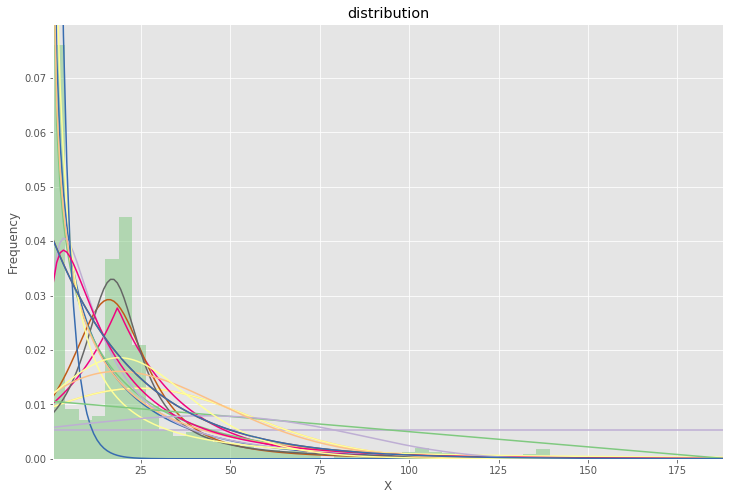

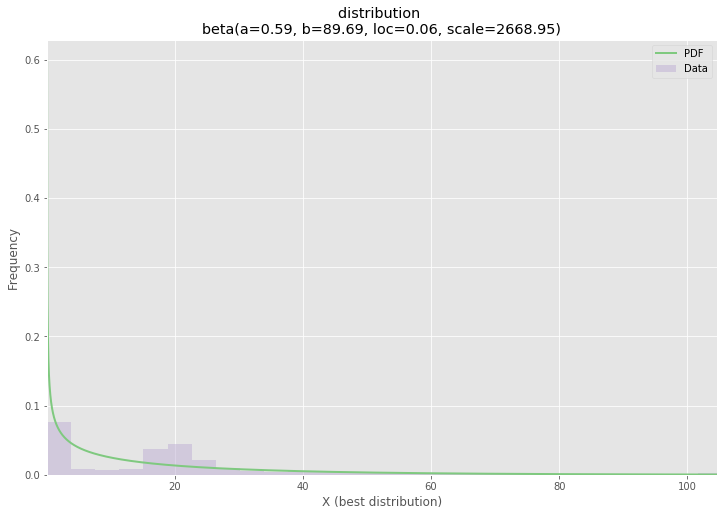

In [214]:
compare_distribution_fits(hist.Close)

In [578]:
import pymc3 as pm
import numpy as np

class Distribution:
    conjugates = {
        st.binom: st.beta,
        st.bernoulli: st.beta,
        st.expon: st.gamma,
        st.poisson: st.gamma,
        st.norm: st.norm,
        st.lognorm: st.norm,
        st.weibull_min: st.invgamma,
        st.gamma: st.gamma
    }
    pm_dists = {
        st.binom: pm.Binomial,
        st.beta: pm.Beta,
        st.bernoulli: pm.Bernoulli,
        st.expon: pm.Exponential,
        st.gamma: pm.Gamma,
        st.poisson: pm.Poisson,
        st.norm: pm.Normal,
        st.lognorm: pm.Lognormal,
        st.weibull_min: pm.Weibull,
        st.invgamma: pm.InverseGamma,
    }
    def __init__(self, dist):
        '''Given a scipy distribution'''
        self.dist = dist
        self.conjugate = self.conjugates[self.dist]
        
    def fit(self, data):
        self.params, self.sse = fit_distribution(data, self.dist)
        self.params2, self.sse2 = fit_distribution(
            data,
            self.conjugate
        )
        return self

    def get_prior(self, name='noise'):
        return self.pm_dists[self.conjugate](
            name,
            *list(self.params2)
        )
    
    def get_likelihood(self, name='y_observed'):
        return self.pm_dists[self.dist](
            name,
            *list(self.params)
        )

In [579]:
dist = Distribution(st.gamma).fit(X)

In [580]:
class LinearModel(sklearn.base.RegressorMixin):
    def __init__(self, dist=st.gamma):
        self.dist = Distribution(dist)
        
    def fit(self, X, y):
        self.dist.fit(X)
        with pm.Model() as linear_model:
            self.weights = self.dist.get_likelihood('weights')
            self.noise = self.dist.get_prior('noise')
            y_observed = self.dist.pm_dists[self.dist.dist](
                'y_observed',
                alpha=self.dist.params[0],
                beta=self.dist.params[1],
                mu=X@self.weights,
                sigma=self.noise,
                observed=y[:, 0]
            )
            prior = pm.sample_prior_predictive()
            posterior = pm.sample(cores=4)
            self.posterior_pred = pm.sample_posterior_predictive(
                posterior
            )
        return self

In [304]:
lin_model = LinearModel(dist=st.gamma)
lin_model = lin_model.fit(
    X_train, y_train
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [noise, weights]
Sampling 4 chains, 2 divergences: 100%|██████████| 4000/4000 [00:01<00:00, 2613.47draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 2000/2000 [00:04<00:00, 461.80it/s]


In [158]:
hist.Close.values.mean()

24.505852239674226

In [100]:
model_reg = MLPRegressor(n_hidden=2)
model_reg.fit(X_train, y_train, inference_type='advi')

Average Loss = 9,933.1: 100%|██████████| 200000/200000 [10:08<00:00, 328.59it/s]
Finished [100%]: Average Loss = 9,933.1
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

MLPRegressor(n_hidden=2)

In [472]:
y_pred = model2.predict(X_test)

/home/ben/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 2000/2000 [00:33<00:00, 60.14it/s]


In [430]:
y_pred_reg = model_reg.predict(X_test)

100%|██████████| 2000/2000 [00:30<00:00, 65.00it/s]


In [431]:
sklearn.metrics.mean_squared_error(y_test, y_pred_reg)

0.0010218673967031444

In [475]:
y_pred_prob = model2.predict_proba(X_test)

/home/ben/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 2000/2000 [00:31<00:00, 64.08it/s]


In [582]:
import sklearn

In [479]:
sklearn.metrics.roc_auc_score(y_test > 0, y_pred_prob)

0.9818666085440279

In [473]:
sklearn.metrics.roc_auc_score(y_test > 0, y_pred)

0.9486011333914559

In [20]:
y_pred

array([False, False, False,  True,  True,  True,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False, False, False, False,  True, False,  True,  True, False,
        True,  True,  True, False, False, False, False,  True, False,
       False, False])

In [31]:
hist.Close

Date
1986-03-13      0.06
1986-03-14      0.06
1986-03-17      0.07
1986-03-18      0.06
1986-03-19      0.06
               ...  
2020-04-13    165.51
2020-04-14    173.70
2020-04-15    171.88
2020-04-16    177.04
2020-04-17    178.60
Name: Close, Length: 8595, dtype: float64

# See also

## stock predictions
* https://github.com/huseinzol05/Stock-Prediction-Models
* https://github.com/kristpapadopoulos/seriesnet
* https://github.com/keon/deepstock
